# Homework 02

# Homework 02


## Part 1 - Questions

### Question 1: 

Which country consumes the most alcohol?

* Who (population): Global Countries
* What (subject, discipline): Alcohol Consumption
* Where (location): Global
* When (snapshot, longitudinal): Annual
* How much data do you need to do the analysis/work: All countries and their alcohol consumption

### Question 2: 

Do countries with colder climates typically consume more alcohol than those with warmer climates?

* Who (population): Global Countries
* What (subject, discipline): Alcohol Consumtion vs. Climate
* Where (location): Global
* When (snapshot, longitudinal): Annual
* How much data do you need to do the analysis/work: All countries and their alcohol consumption + their climate/weather patterns

### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?

World Health Organization 

## Part 2 - Selecting a Data Set, Adding Documentation


1. Name / Title: Alcohol Consumption: Where Do People Drink The Most Beer, Wine And Spirits?
2. Link to Data: https://www.kaggle.com/mysarahmadbhat/alcohol-consumption
3. Source / Origin: 
	* Author or Creator: World Health Organization, Global Information System on Alcohol and Health (GISAH
	* Publication Date: 2010
	* Publisher: World Health Organization, Kaggle
	* Version or Data Accessed: 2010
4. License: CC0: Public Domain
5. Can You Use this Data Set for Your Intended Use Case? Yes


## Format




### Overview

* Format: .csv
* Size: 4KB
* Number of Records: 193



### Sample of Data




In [17]:
# TODO show a few lines of data from the actual file

# Use "regular" Python to do this in this code block
# Assume that jupyter-lab was started in your root directory
# with open('./data/raw/example-data.csv', 'r'): 
import csv

with open('../data/raw/drinks.csv', 'r') as f:
    reader = csv.reader(f)
    for i,line in enumerate(reader):
        print('line[{}] = {}'.format(i,line))
        if i>9:
            break

line[0] = ['country', 'beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
line[1] = ['Afghanistan', '0', '0', '0', '0.0']
line[2] = ['Albania', '89', '132', '54', '4.9']
line[3] = ['Algeria', '25', '0', '14', '0.7']
line[4] = ['Andorra', '245', '138', '312', '12.4']
line[5] = ['Angola', '217', '57', '45', '5.9']
line[6] = ['Antigua & Barbuda', '102', '128', '45', '4.9']
line[7] = ['Argentina', '193', '25', '221', '8.3']
line[8] = ['Armenia', '21', '179', '11', '3.8']
line[9] = ['Australia', '261', '72', '212', '10.4']
line[10] = ['Austria', '279', '75', '191', '9.7']



### Fields or Column Headers

* Field/Column 1: Country - string
* Field/Column 2: # of beer servings - int
* Field/Column 3: # of spirit servings - int
* Field/Column 4: # of wine servings - int
* Field/Column 5: total litres of pure alcohol - int

## Part 3 - Extract / Transform

* Extract first and final column  - country and total litres of alcohol overall
* skimmed over the data - no anomolies - could use -> if (data entry) contains (str ,if you want integers): skip/pass
* will probably convert all columns into floats (2f) to match up types

In [201]:
# extract
import csv
import numpy as np

file = '../data/raw/drinks.csv'

fields_list = []
beer_list = []
spirit_list = []
wine_list = []
total_alc_list = []

with open(file) as f:
    reader = csv.reader(f)
    headers = next(reader)
    
    for row in reader:
        fields_list.append(row[0])
        beer_list.append(row[1])
        spirit_list.append(row[2])
        wine_list.append(row[3])
        total_alc_list.append(row[4])
        
        for entry in row:
            if isinstance(entry,str):
                if entry == '':
                    entry = None
                else:
                    continue
            elif isinstance(entry,int):
                if entry == None:
                    entry = 0
            else:
                continue
                
fields = np.array(fields_list)
beers = np.array(beer_list,dtype=np.float128)
spirits = np.array(spirit_list,dtype=np.float128)
wines = np.array(wine_list,dtype=np.float128)
total_alc = np.array(total_alc_list, dtype=np.float128)

total_alc

array([ 0. ,  4.9,  0.7, 12.4,  5.9,  4.9,  8.3,  3.8, 10.4,  9.7,  1.3,
        6.3,  2. ,  0. ,  6.3, 14.4, 10.5,  6.8,  1.1,  0.4,  3.8,  4.6,
        5.4,  7.2,  0.6, 10.3,  4.3,  6.3,  4. ,  4. ,  2.2,  5.8,  8.2,
        1.8,  0.4,  7.6,  5. ,  4.2,  0.1,  1.7,  5.9,  4.4, 10.2,  4.2,
        8.2, 11.8,  0. ,  2.3, 10.4,  1.1,  6.6,  6.2,  4.2,  0.2,  2.2,
        5.8,  0.5,  9.5,  0.7,  2. , 10. , 11.8,  8.9,  2.4,  5.4, 11.3,
        1.8,  8.3, 11.9,  2.2,  0.2,  2.5,  7.1,  5.9,  3. , 11.3,  6.6,
        2.2,  0.1,  0. ,  0.2, 11.4,  2.5,  6.5,  3.4,  7. ,  0.5,  6.8,
        1.8,  1. ,  0. ,  2.4,  6.2, 10.5,  1.9,  2.8,  3.1,  0. , 12.9,
       11.4,  0.8,  1.5,  0.3,  0. ,  0.6,  6.6,  0. ,  0. ,  2.6,  5.5,
        2.3,  0. ,  4.9,  4.9,  0.5,  1.3,  0.1,  6.8,  1. ,  0.2,  9.4,
        9.3,  3.5,  0.1,  9.1,  7. ,  6.7,  0.7,  0. ,  6.9,  7.2,  1.5,
        7.3,  6.1,  4.6, 10.9, 11. ,  0.9,  9.8,  6.3, 10.4, 11.5,  6.8,
        7.7, 10.1,  6.3,  2.6,  0. ,  4.2,  0.1,  0

## Part 4 - Descriptive Statistics

### Analysis on Numeric Data

#### Central Tendency



In [217]:
# mean, median

print('Mean beer consumption by country: ', np.round(np.mean(beers),2))
print('Mean spirit consumption by country: ', np.round(np.mean(spirits),2))
print('Mean wine consumption by country: ', np.round(np.mean(wines),2))
print('\n--> Mean total alcohol consumption by country: ', np.round(np.mean(total_alc),2))

print('\nMedian beer consumption by country: ', np.round(np.median(beers),2))
print('Median spirit consumption by country: ', np.round(np.median(spirits),2))
print('Median wine consumption by country: ', np.round(np.median(wines),2))
print('\n--> Median total alcohol consumption by country: ', np.round(np.median(total_alc),2))


Mean beer consumption by country:  106.16
Mean spirit consumption by country:  80.99
Mean wine consumption by country:  49.45

--> Mean total alcohol consumption by country:  4.72

Median beer consumption by country:  76.0
Median spirit consumption by country:  56.0
Median wine consumption by country:  8.0

--> Median total alcohol consumption by country:  4.2


#### Dispersion

In [224]:
#variance, standard deviation
print('Standard deviation for beer consumption by country: ', np.round(np.std(beers),2))
print('Standard deviation for spirit consumption by country: ', np.round(np.std(spirits),2))
print('Standard deviation for wine consumption by country: ', np.round(np.std(wines),2))
print('\n--> Standard deviation for total alcohol consumption by country: ', np.round(np.std(total_alc),2))

print('\nVariance for beer consumption by country: ', np.round(np.var(beers),2))
print('Variance for spirit consumption by country: ', np.round(np.var(spirits),2))
print('Variance for wine consumption by country: ', np.round(np.var(wines),2))
print('\n--> Variance for total alcohol consumption by country: ', np.round(np.var(total_alc),2))

Standard deviation for beer consumption by country:  100.88
Standard deviation for spirit consumption by country:  88.06
Standard deviation for wine consumption by country:  79.49

--> Standard deviation for total alcohol consumption by country:  3.76

Variance for beer consumption by country:  10176.92
Variance for spirit consumption by country:  7753.74
Variance for wine consumption by country:  6318.8

--> Variance for total alcohol consumption by country:  14.16


#### Outliers


In [251]:
# range, min, max

bmin = np.nanmin(beers)
smin = np.nanmin(spirits)
wmin = np.nanmin(wines)
tmin = np.nanmin(total_alc)
print('Minimum for beer consumption by country: ', bmin)
print('Minimum for spirit consumption by country: ', smin)
print('Minimum for wine consumption by country: ', wmin)
print('\n--> Minimum for total alcohol consumption by country: ', tmin)

bmax = np.amax(beers)
smax = np.amax(spirits)
wmax = np.amax(wines)
tmax = np.amax(wines)
print('\nMaximum for beer consumption by country: ', bmax)
print('Maximum for spirit consumption by country: ', smax)
print('Maximum for wine consumption by country: ', wmax)
print('\n--> Maximum for total alcohol consumption by country: ', tmax)

print('\nRange for beer consumption by country: ', bmax-bmin)
print('Range for spirit consumption by country: ', smax-smin)
print('Range for wine consumption by country: ', wmax-wmin)
print('\n--> Range for total alcohol consumption by country: ', tmax-tmin)

Minimum for beer consumption by country:  0.0
Minimum for spirit consumption by country:  0.0
Minimum for wine consumption by country:  0.0

--> Minimum for total alcohol consumption by country:  0.0

Maximum for beer consumption by country:  376.0
Maximum for spirit consumption by country:  438.0
Maximum for wine consumption by country:  370.0

--> Maximum for total alcohol consumption by country:  370.0

Range for beer consumption by country:  376.0
Range for spirit consumption by country:  438.0
Range for wine consumption by country:  370.0

--> Range for total alcohol consumption by country:  370.0


#### Other


In [308]:
# number of a countries, b countries, etc - for each letter of alphabet
import string

maindict = dict()

for country in fields:
    first_letter = str(country[0])

    if first_letter in maindict:
        maindict[first_letter].append(country)
    elif first_letter not in maindict:
        maindict[first_letter] = [country]
    else:
        raise ValueError('You should not be getting this error lol')

for key in maindict:
    print("Number of countries starting with {}: {}".format(key, len(maindict[key])))

Number of countries starting with A: 11
Number of countries starting with B: 17
Number of countries starting with C: 18
Number of countries starting with N: 11
Number of countries starting with D: 5
Number of countries starting with E: 7
Number of countries starting with F: 3
Number of countries starting with G: 11
Number of countries starting with H: 3
Number of countries starting with I: 8
Number of countries starting with J: 3
Number of countries starting with K: 5
Number of countries starting with L: 8
Number of countries starting with M: 19
Number of countries starting with O: 1
Number of countries starting with P: 9
Number of countries starting with Q: 1
Number of countries starting with S: 26
Number of countries starting with R: 3
Number of countries starting with T: 11
Number of countries starting with U: 7
Number of countries starting with V: 3
Number of countries starting with Y: 1
Number of countries starting with Z: 2


###  Analysis on Categorical Data

#### Frequency

In [363]:
mostn = 0
for key in maindict:
    if len(maindict[key]) > mostn:
        mostn = len(maindict[key])
        mostl = key
    else:
        pass

print('Which letter has the most countries starting with it? : {}'.format(mostl))
print('\nCountries starting with {}: '.format(mostl))
for country in maindict[mostl]:
    print(country)

Which letter has the most countries starting with it? : S

Countries starting with S: 
South Korea
St. Kitts & Nevis
St. Lucia
St. Vincent & the Grenadines
Samoa
San Marino
Sao Tome & Principe
Saudi Arabia
Senegal
Serbia
Seychelles
Sierra Leone
Singapore
Slovakia
Slovenia
Solomon Islands
Somalia
South Africa
Spain
Sri Lanka
Sudan
Suriname
Swaziland
Sweden
Switzerland
Syria


## Part 5 - Visualizations



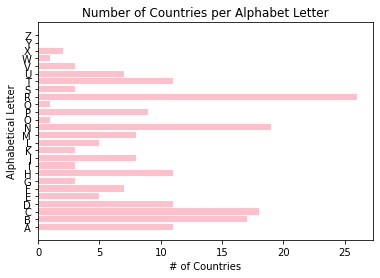

In [419]:
import matplotlib.pyplot as mpl

# number of countries per letter
alphabet = string.ascii_uppercase
x=[]
y=[]
for letter in alphabet:
    x.append(letter)
for key in maindict:
    y.append(len(maindict[key]))

y.append(0)
y.append(0)

mpl.title('Number of Countries per Alphabet Letter', fontdict=None, loc='center', pad=None)
mpl.xlabel('# of Countries',loc='center')
mpl.ylabel('Alphabetical Letter',loc='center')
mpl.barh(x,y, color = 'pink')
mpl.show()

### 


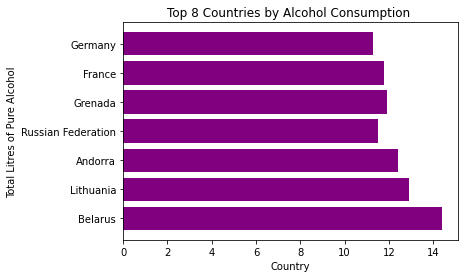

In [450]:
# Top 8 Countries and their alcohol consumption

# top 8 countries:
'''
belarus
lithuania
andorra
russian federation
grenada
france
germany
'''

b = ['Belarus','Lithuania','Andorra','Russian Federation','Grenada','France','Germany']
fake = []
z = []

for c in b:
    indexlist = np.where(fields == c)
    for value in indexlist:
        index = value
    fake.append(total_alc[index])
for n in fake:
    for f in n:
        z.append(f)

mpl.title('Top 8 Countries by Alcohol Consumption ', fontdict=None, loc='center', pad=None)
mpl.xlabel('Country',loc='center')
mpl.ylabel('Total Litres of Pure Alcohol',loc='center')

mpl.barh(b,z, color = 'purple')
mpl.show()

## Part 6 - Conclusion

In answer to the following:

### Question 1: 

Which country consumes the most alcohol?

Belarus consumes the most alcohol, with a whopping 14.4 litres of pure alcohol consumed on average.


### Question 2: 

Do countries with colder climates typically consume more alcohol than those with warmer climates?

Using the dataset I pulled, I can see the top 8 countries with the most alcohol consumed, but it doesn't include the climate of the countries. Therefore, I would have to pull the top 8 countries using the dataset, then look up on my own if they are a cold climate or not. 